In [63]:
from os import path

import astropy.coordinates as coord
from astropy.table import Table
import astropy.units as u
from astropy.io import ascii, fits
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
import reproject

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import h5py

from pyia import GaiaData
import gala.coordinates as gc
from helpers import cluster_c, fig_path
from spectral_cube import SpectralCube

In [11]:
gaia = GaiaData('../data/gaia-cmd-polygon.fits')
decam = Table.read('../output/decam_membership.fits')
decam = decam[decam['membership_prob'] > 0.5]
len(decam)

/Users/adrian/anaconda/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


174

In [14]:
hdu = fits.open('../data/gass_179_-29_1531216613.fits.gz')[0]

In [15]:
hdr = hdu.header
del hdr['CUNIT3']

In [16]:
wcs = WCS(hdr)

In [17]:
cube = SpectralCube.read(hdu)

In [55]:
slabs = []
slabs.append(cube.spectral_slab(25*u.km/u.s, 50*u.km/u.s))
slabs.append(cube.spectral_slab(50*u.km/u.s, 75*u.km/u.s))
slabs.append(cube.spectral_slab(75*u.km/u.s, 100*u.km/u.s))
slabs.append(cube.spectral_slab(100*u.km/u.s, 125*u.km/u.s))
slabs.append(cube.spectral_slab(125*u.km/u.s, 150*u.km/u.s))

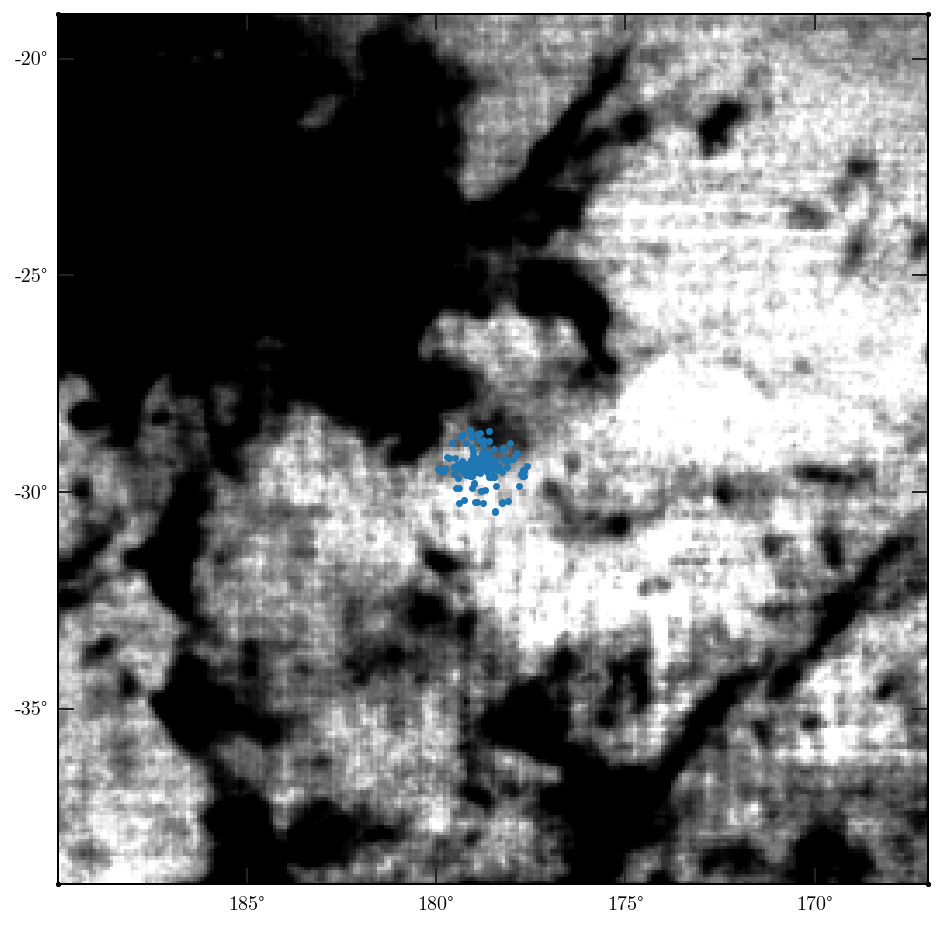

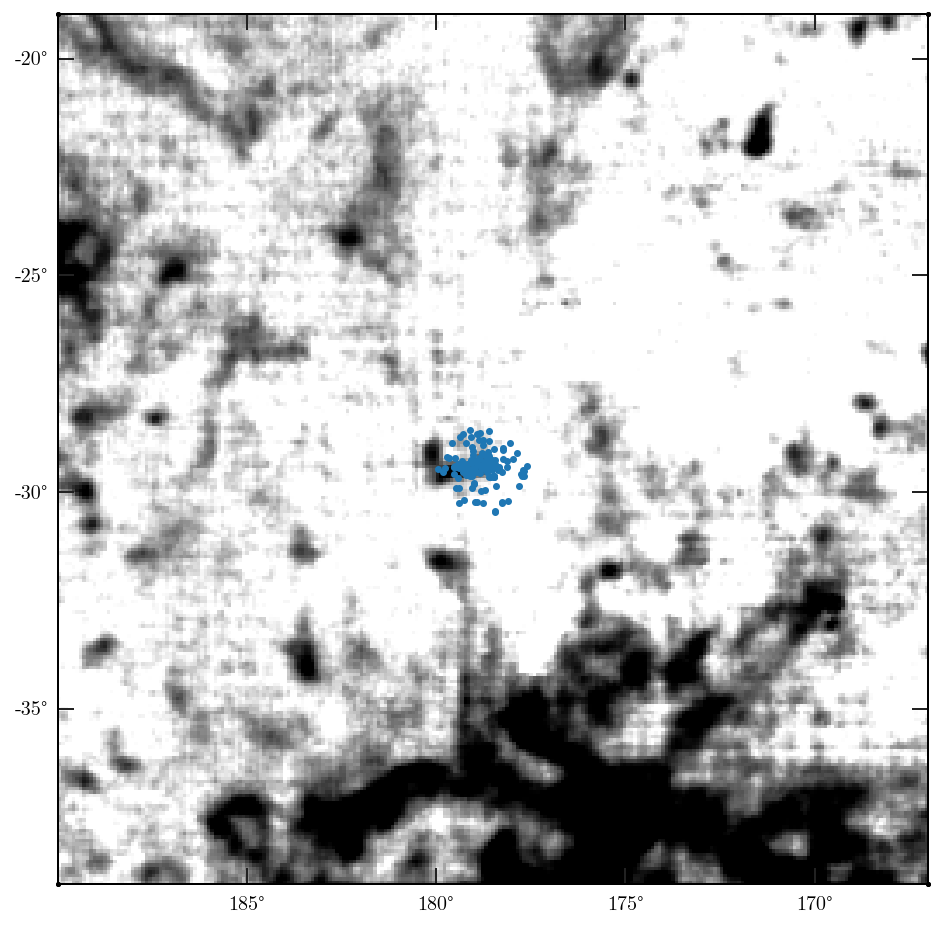

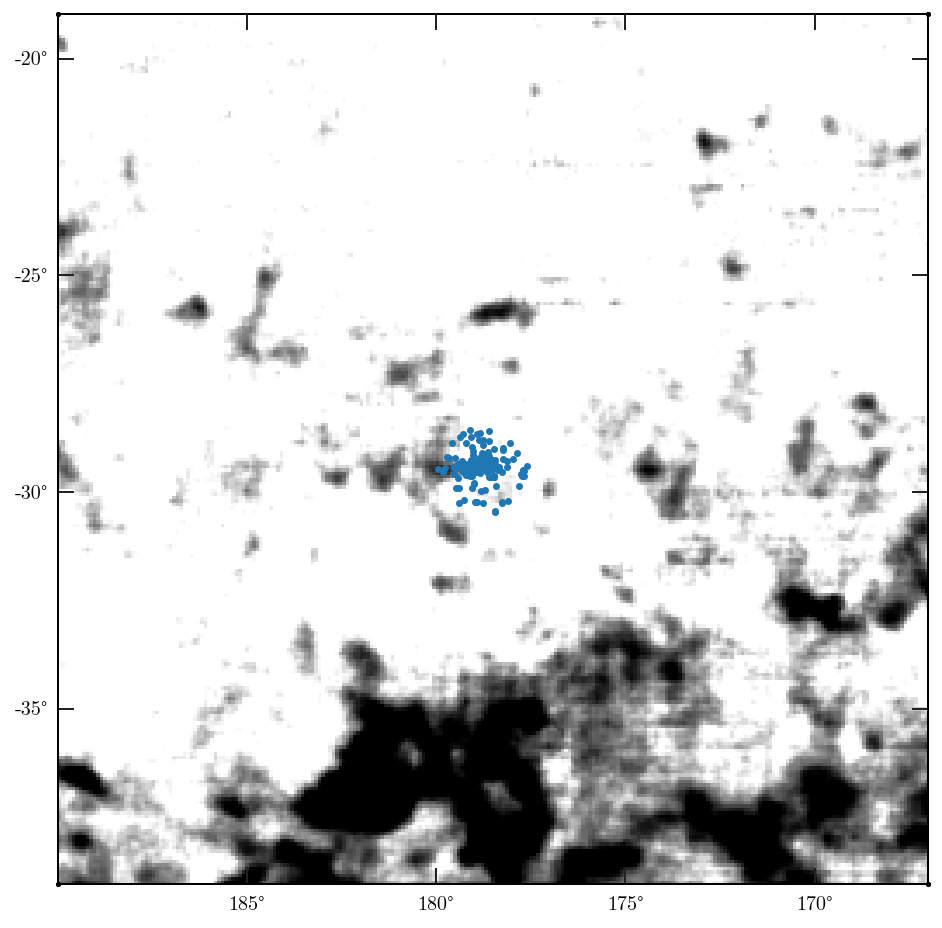

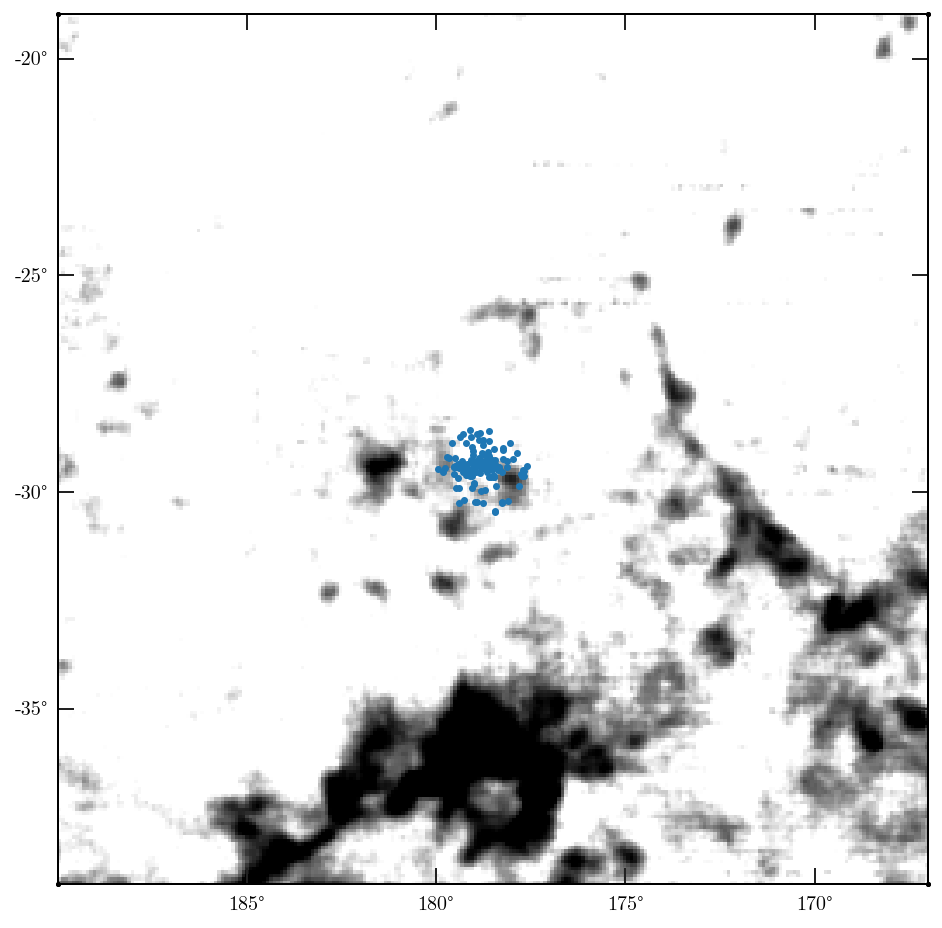

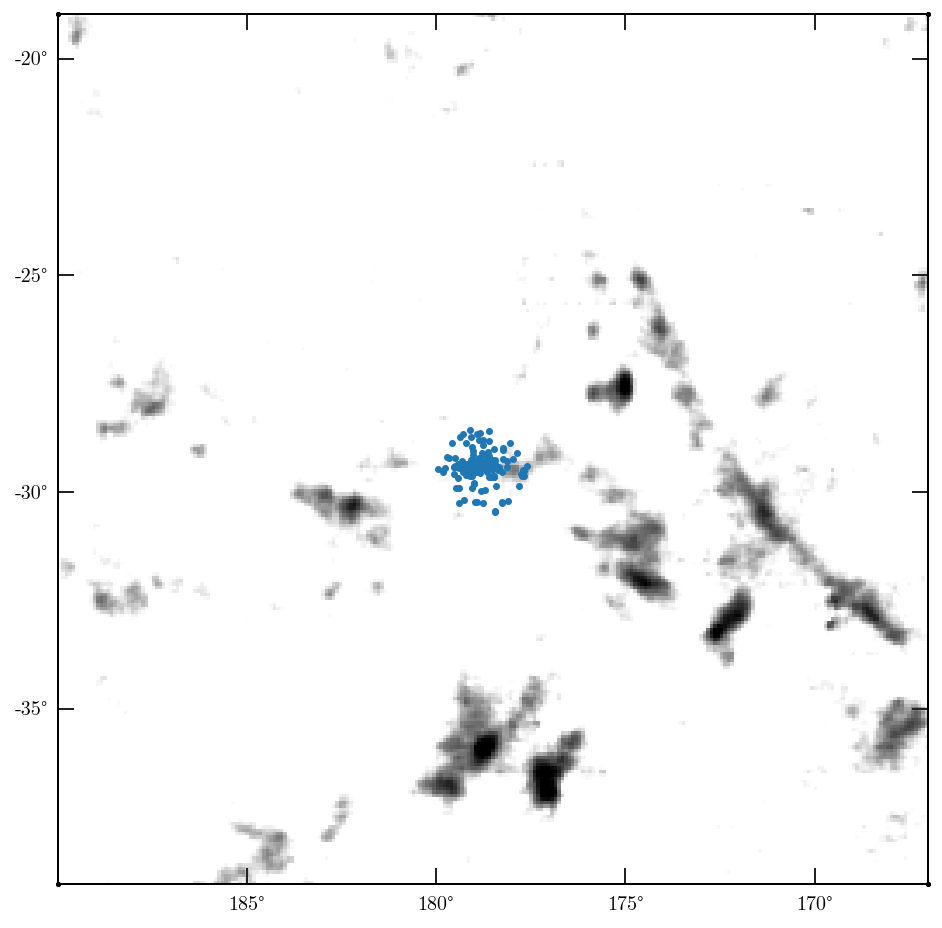

In [56]:
for slab in slabs:
    moment1 = slab.with_spectral_unit(u.km/u.s).moment(order=0) # First moment
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection=moment1.wcs)
    im = ax.imshow(moment1.hdu.data, origin='bottom', cmap='Greys', 
                   norm=mpl.colors.LogNorm(vmin=1, vmax=10))
    ax.scatter(decam['ra'], decam['dec'], marker='.', color='tab:blue',
               transform=ax.get_transform('icrs'))

---

In [8]:
g = GaiaData('../data/cmd-pm-masked.fits')

In [53]:
# hdu_ha1 = fits.open('../data/SHASSA/110h3.mn.fits.gz')[0]
# hdu_ha2 = fits.open('../data/SHASSA/111h3.mn.fits.gz')[0]
hdu_ha1 = fits.open('../data/SHASSA/110.sm.fits.gz')[0]
hdu_ha2 = fits.open('../data/SHASSA/111.sm.fits.gz')[0]

wcs_ha1 = WCS(hdu_ha1.header)
wcs_ha2 = WCS(hdu_ha2.header)

PDAY        = 210.5613                                                           [astropy.io.fits.card]


In [54]:
wcs_ha1

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 173.121  -30.27  
CRPIX : 508.469  495.3607  
CD1_1 CD1_2  : -0.013212596066  -0.000651079754  
CD2_1 CD2_2  : -0.000656888238  0.013220670633  
NAXIS : 1014  998

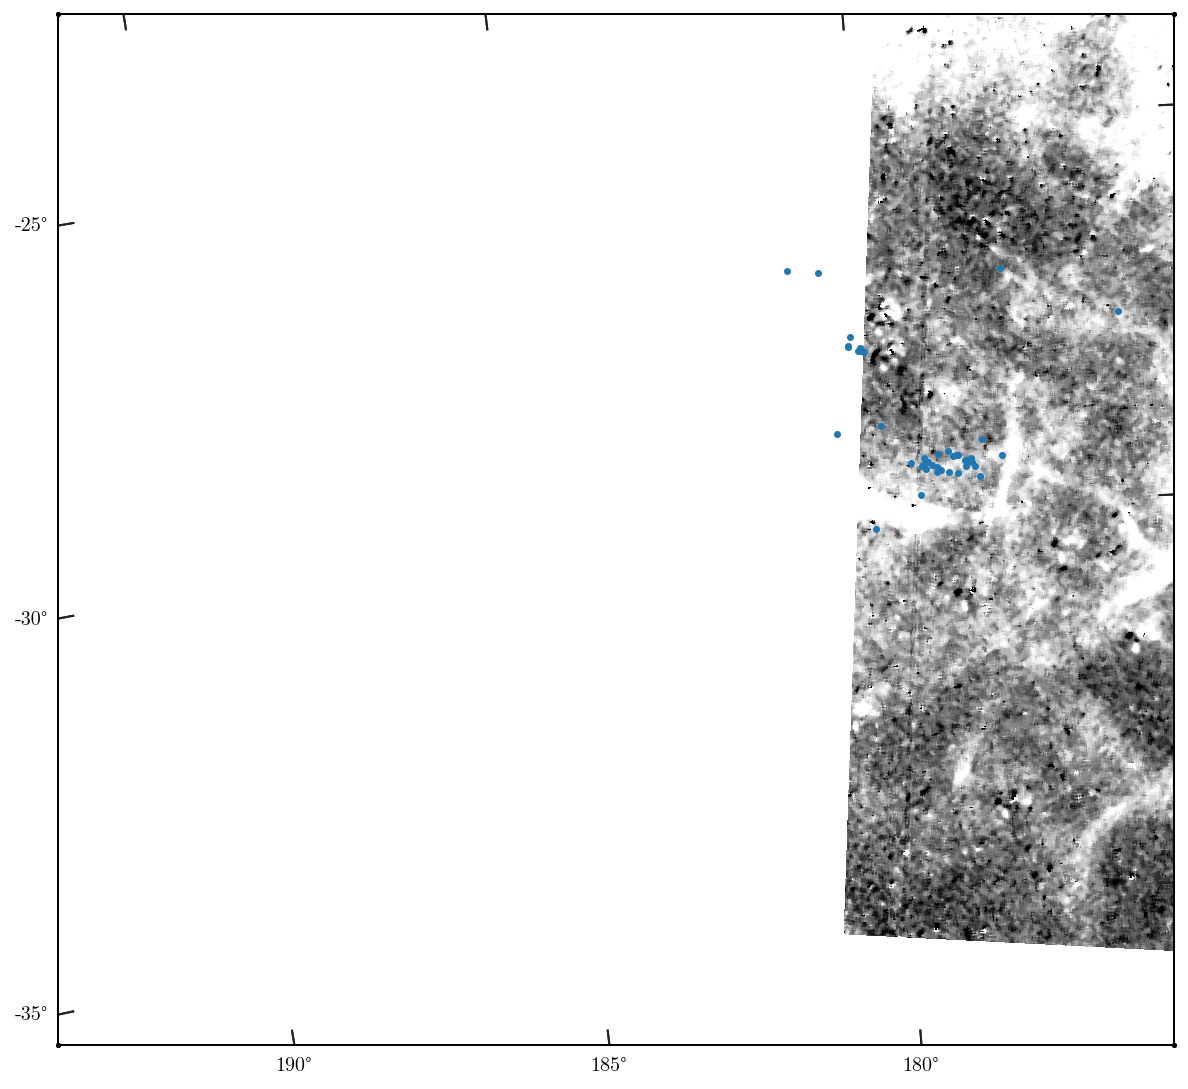

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), 
                       subplot_kw=dict(projection=wcs_ha2))

_data = hdu_ha1.data.ravel()
ax.imshow(hdu_ha1.data.T, cmap='Greys_r', 
          vmin=np.nanpercentile(_data, 5), 
          vmax=np.nanpercentile(_data, 95),
          origin='lower', transform=ax.get_transform(wcs_ha1))

# _data = hdu_ha2.data.ravel()
# ax.imshow(hdu_ha2.data.T, cmap='Greys_r', 
#           vmin=np.nanpercentile(_data, 5), 
#           vmax=np.nanpercentile(_data, 95),
#           origin='lower', transform=ax.get_transform(wcs_ha2))

# ax.contour(two_d, transform=ax.get_transform(two_d.wcs),
#            colors='red', alpha=0.65)

ax.scatter(g.ra.value, g.dec.value, marker='.',
           transform=ax.get_transform('icrs'))

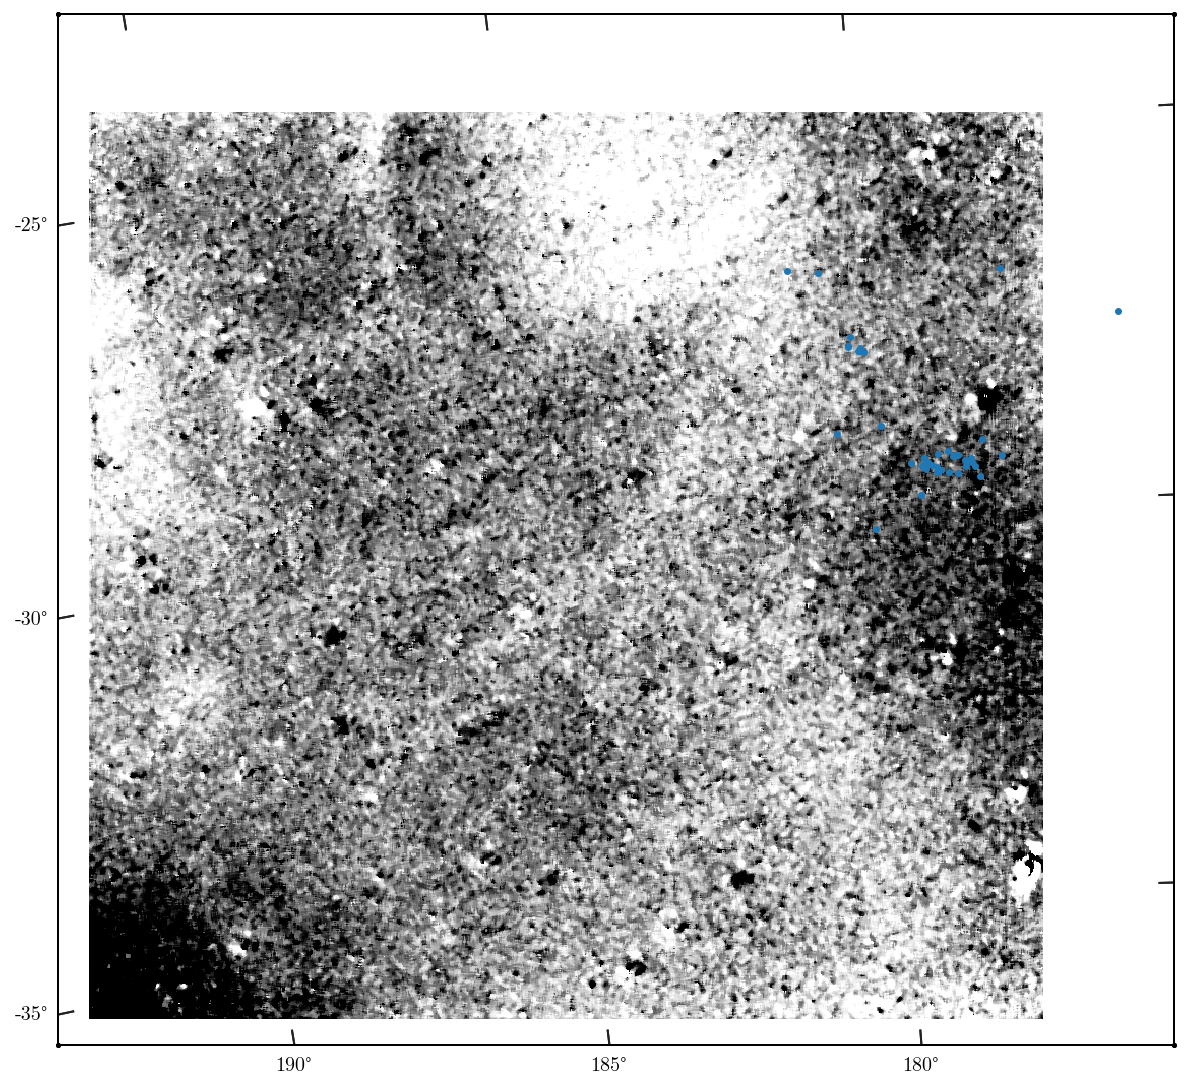

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), 
                       subplot_kw=dict(projection=wcs_ha2))

# _data = hdu_ha1.data.ravel()
# ax.imshow(hdu_ha1.data.T, cmap='Greys_r', 
#           vmin=np.nanpercentile(_data, 5), 
#           vmax=np.nanpercentile(_data, 95),
#           origin='lower', transform=ax.get_transform(wcs_ha1))

_data = hdu_ha2.data.ravel()
ax.imshow(hdu_ha2.data.T, cmap='Greys_r', 
          vmin=np.nanpercentile(_data, 5), 
          vmax=np.nanpercentile(_data, 95),
          origin='lower', transform=ax.get_transform(wcs_ha2))

# ax.contour(two_d, transform=ax.get_transform(two_d.wcs),
#            colors='red', alpha=0.65)

ax.scatter(g.ra.value, g.dec.value, marker='.',
           transform=ax.get_transform('icrs'))

## Venzmer Clouds

In [168]:
cluster_ms = cluster_c.transform_to(gc.MagellanicStream)

In [166]:
decam_c = coord.SkyCoord(ra=decam['ra']*u.deg,
                         dec=decam['dec']*u.deg)
decam_ms = decam_c.transform_to(gc.MagellanicStream)

In [176]:
venzmer = Table.read('../data/LA-clouds-Venzmer.fit')
venzmer = venzmer[venzmer['M'] > 1000]

venz_c = coord.SkyCoord(ra=venzmer['RAJ2000'], 
                        dec=venzmer['DEJ2000'])

# venzmer = venzmer[venz_c.separation(cluster_c) < (25 * u.deg)]
# venz_c = venz_c[venz_c.separation(cluster_c) < (25 * u.deg)]

venz_ms = venz_c.transform_to(gc.MagellanicStream)

In [177]:
def NH_to_alpha(x):
    val = x / 1e18
    norm = mpl.colors.Normalize(vmin=1, vmax=8, clip=True)
    return norm(val)

def HRV_to_color(x):
    norm = mpl.colors.Normalize(vmin=50, vmax=250, clip=True)
    cmap = plt.get_cmap('rainbow')
    return cmap(norm(x))

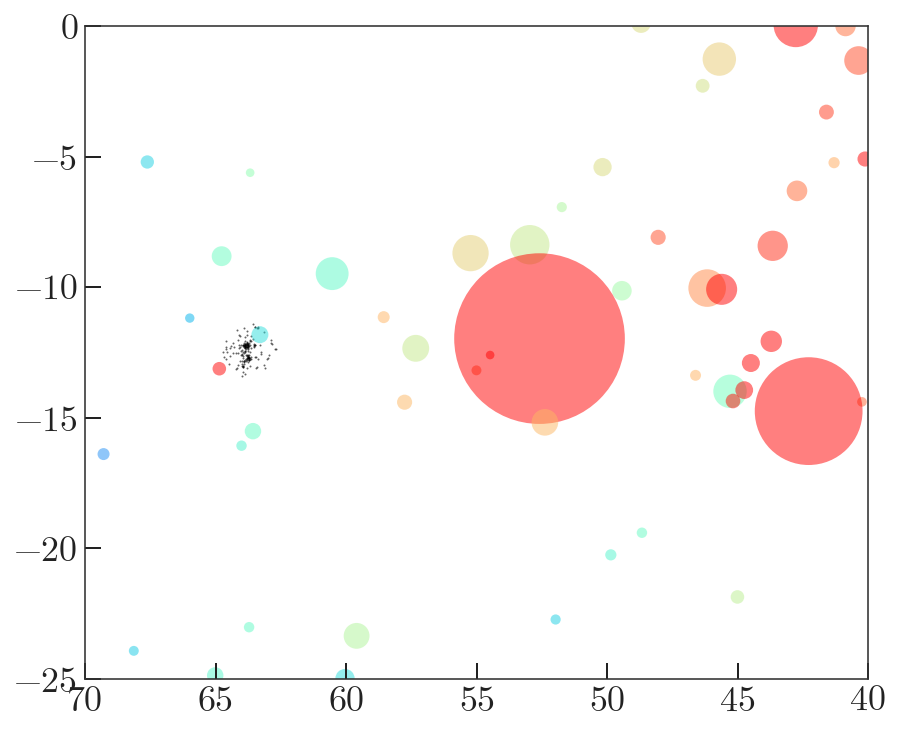

In [187]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(decam_ms.L.wrap_at(180*u.deg).degree,
        decam_ms.B.degree,
        marker='.', color='k', 
        ms=2, alpha=0.6, ls='none', zorder=-100)

for row, row_c in zip(venzmer, venz_ms):
    circ = mpl.patches.Circle((row_c.L.wrap_at(180*u.deg).degree,
                               row_c.B.degree),
                              radius=row['Diam']/2., 
                              facecolor=HRV_to_color(row['HRV']), 
                              alpha=0.5)
    ax.add_patch(circ)

ax.set_xlim(70, 40)
ax.set_ylim(-25, 0)
ax.set_aspect('equal')